Logistic Regression

In [12]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

In [2]:
xtrain = np.loadtxt('Data/train_data.csv', delimiter=',')
ytrain = np.loadtxt('Data/train_labels.csv', delimiter=',')
xtest = np.loadtxt('Data/test_data.csv', delimiter=',')

In [3]:
print(xtrain.shape)
print(xtrain)
print(ytrain.shape)
print(ytrain)

(4363, 264)
[[  3.73870000e+01  -1.72830000e+01   4.96400000e+01 ...,   1.70550000e+00
    1.03780000e+00   4.93660000e-02]
 [  4.94260000e+01   4.33780000e+01   8.73340000e+00 ...,   3.90250000e+00
    1.45800000e+00   1.06600000e-03]
 [  4.20750000e+01  -8.49980000e+01   8.62540000e-01 ...,   3.50320000e+00
    1.22110000e+00   1.06600000e-03]
 ..., 
 [  3.60810000e+01  -5.91510000e+01  -3.58150000e+01 ...,   2.03580000e+00
    8.31680000e-01   1.06600000e-03]
 [  4.22170000e+01  -4.59620000e+01  -3.39030000e+00 ...,   4.53300000e+00
    2.00180000e+00   3.17350000e-01]
 [  3.67530000e+01  -1.63540000e+00  -7.33680000e+01 ...,   1.67760000e+00
    7.72530000e-01   1.06600000e-03]]
(4363,)
[ 1.  1.  1. ...,  2.  5.  2.]


In [4]:
# instantiate a logistic regression model
model = LogisticRegression()

In [5]:
#fit with X and y
model = model.fit(xtrain, ytrain)

In [6]:
# check the accuracy on the training set
model.score(xtrain, ytrain)

0.72518909007563603

In [7]:
#predict the labels on test set
ypred=model.predict(xtest)

In [8]:
ypred

array([ 3.,  9.,  1., ...,  1.,  3.,  1.])

In [17]:
ypredt=model.predict(xtrain)

In [9]:
#get the probabilities per class, needed for the log loss
model.predict_proba(xtest)

array([[  1.39997566e-01,   4.84079170e-02,   5.05471536e-01, ...,
          7.67067287e-05,   3.68311276e-03,   4.96999028e-03],
       [  2.90945974e-02,   1.01966076e-02,   1.51947896e-01, ...,
          3.57423873e-03,   4.56248786e-01,   1.23420486e-03],
       [  7.76682430e-01,   1.58194970e-02,   4.59668885e-04, ...,
          2.07363664e-02,   2.38220540e-04,   2.91570430e-02],
       ..., 
       [  8.05149138e-01,   9.30972769e-02,   4.71992823e-02, ...,
          1.58431843e-02,   3.67175435e-04,   1.00459982e-02],
       [  1.33656784e-01,   1.28462425e-01,   7.35681143e-01, ...,
          3.13071628e-06,   4.44335461e-05,   3.78344669e-05],
       [  7.01477950e-01,   2.92182460e-02,   5.07555717e-04, ...,
          9.67110162e-02,   1.78891620e-04,   2.91374963e-02]])

Confusion matrix

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(ytrain, ypredt)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[1980   85   23   22   13   33    3   17    2    0]
 [ 152  423   15   12    3    6    1    1    4    1]
 [  45   14  252    5    3    3    1    0    3    0]
 [  55   26    2  155    2    8    3    1    0    1]
 [ 104   10    5   10   68    5    6    3    0    3]
 [  90    9   19   11    7  113    0    7    3    1]
 [  72   13    4    8    7    6   24    4    3    0]
 [ 111    1    1    4    1    1    0   76    0    0]
 [  14    7    9    0    4    5    0    0   52    1]
 [  52    0    1    4    4    0    0    4    0   21]]


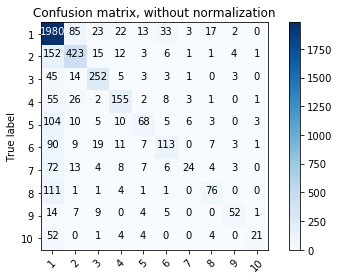

In [27]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4,5,6,7,8,9,10],
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[ 0.91  0.04  0.01  0.01  0.01  0.02  0.    0.01  0.    0.  ]
 [ 0.25  0.68  0.02  0.02  0.    0.01  0.    0.    0.01  0.  ]
 [ 0.14  0.04  0.77  0.02  0.01  0.01  0.    0.    0.01  0.  ]
 [ 0.22  0.1   0.01  0.61  0.01  0.03  0.01  0.    0.    0.  ]
 [ 0.49  0.05  0.02  0.05  0.32  0.02  0.03  0.01  0.    0.01]
 [ 0.35  0.03  0.07  0.04  0.03  0.43  0.    0.03  0.01  0.  ]
 [ 0.51  0.09  0.03  0.06  0.05  0.04  0.17  0.03  0.02  0.  ]
 [ 0.57  0.01  0.01  0.02  0.01  0.01  0.    0.39  0.    0.  ]
 [ 0.15  0.08  0.1   0.    0.04  0.05  0.    0.    0.57  0.01]
 [ 0.6   0.    0.01  0.05  0.05  0.    0.    0.05  0.    0.24]]


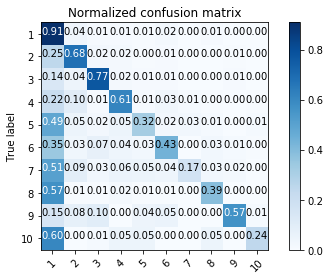

In [29]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4,5,6,7,8,9,10], normalize=True,
                      title='Normalized confusion matrix')

Prepare submission

In [20]:
subm=pd.DataFrame(ypred,columns=['Sample_label'])
subm.index+=1
subm=subm.astype(int)

In [10]:
subm

,Sample_label
1,3
2,9
3,1
4,1
5,1
6,1
7,5
8,1
9,1
10,1


In [11]:
subm.to_csv('Solutions/log_solution_accuracy_0911.csv',index_label='Sample_id')

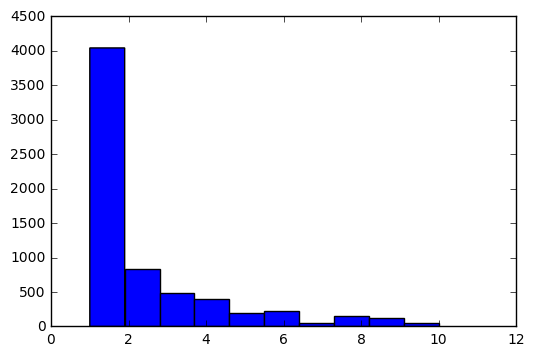

In [12]:
import matplotlib.pyplot as plt
plt.hist(ypred)
plt.show()

Same with normalized data

In [30]:
scaler = StandardScaler()
xtrain_nl = scaler.fit_transform(xtrain)
xtest_nl = scaler.fit_transform(xtest)
X_train_nl, X_train2_nl, y_train, y_train2 = train_test_split(xtrain_nl, ytrain, 
                                                        test_size=0.33, random_state=42)

In [31]:
print(X_train_nl.shape)
print(X_train2_nl.shape)

(2923, 264)
(1440, 264)


In [32]:
model_nl = LogisticRegression()
model_nl = model_nl.fit(X_train_nl, y_train)

In [8]:
model_nl.score(X_train2_nl, y_train2)

0.6430555555555556

In [9]:
X_train, X_train2, y_train, y_train2 = train_test_split(xtrain, ytrain, 
                                                        test_size=0.33, random_state=42)
model_raw = LogisticRegression()
model_raw = model_raw.fit(X_train, y_train)
model_raw.score(X_train2, y_train2)

0.64652777777777781

In [33]:
# subm for nl version LR
model_nl = LogisticRegression()
model_nl = model_nl.fit(xtrain_nl, ytrain)
model_nl.score(xtrain_nl, ytrain)
ypred_nl = model_nl.predict(xtest_nl)

In [10]:
subm = pd.DataFrame(ypred_nl,columns=['Sample_label'])
subm.index += 1
subm = subm.astype(int)
subm.to_csv('Solutions/logistic_normalization_1111.csv',
            index_label='Sample_id')

In [11]:
model_nl.score(xtrain_nl, ytrain)

0.76346550538620217

In [34]:
ypred_prob=model_nl.predict_proba(xtest)

/home/tinka/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [46]:
#score on this one is reallly bad: 1.48. Not sure why.. 
subm = pd.DataFrame(ypred_prob,columns=['Class_'+str(i) for i in range(1,11)])
#round was to test if the score changes, but it doesn't
subm=subm.round(4)
subm.index += 1
#subm = subm.astype(int)
subm.to_csv('Solutions/probabilities_logistic_normalization_1711.csv',
            index_label='Sample_id')

In [47]:
#interesting to see though. It is clearly often doubting between two (or 3 or 4) classes. 
subm

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Class_10
1,0.5000,0.5000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000
2,0.5000,0.5000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000
3,0.5000,0.5000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000
4,0.3342,0.3342,0.0,0.0,0.0000,0.3317,0.0,0.0,0.0,0.0000
5,0.3333,0.0000,0.0,0.0,0.0000,0.3333,0.0,0.0,0.0,0.3333
6,0.5000,0.5000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000
7,0.2500,0.2500,0.0,0.0,0.0000,0.2500,0.0,0.0,0.0,0.2500
8,0.5000,0.5000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000
9,0.5000,0.5000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000
10,0.5000,0.5000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000
